In [1]:
from imblearn.over_sampling import SMOTE

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("ctrain_fb.csv")

In [4]:
# Separate features and target
X = df.drop('label', axis=1)
y = df['label']

In [5]:
import matplotlib.pyplot as plt

In [6]:
label_counts = y.value_counts()

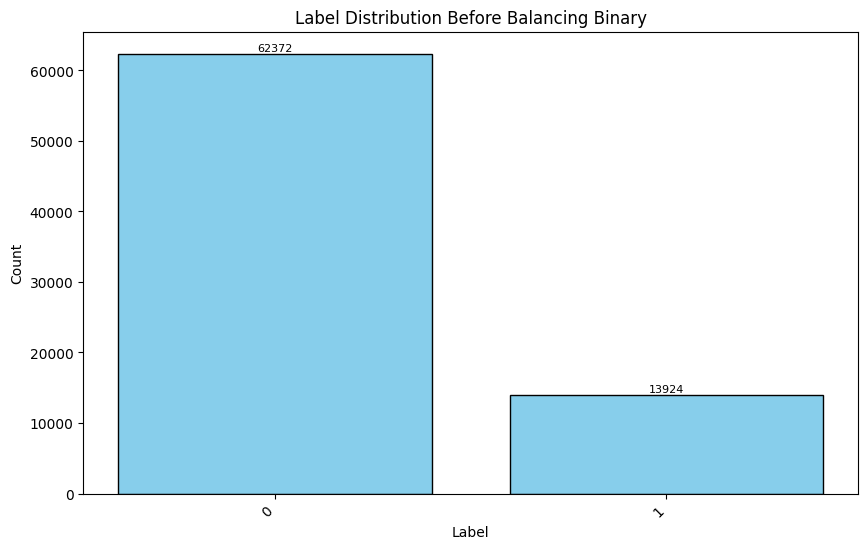

In [7]:
plt.figure(figsize=(10, 6))
bars = plt.bar(label_counts.index.astype(str), label_counts.values, color='skyblue', edgecolor='black')

plt.title("Label Distribution Before Balancing Binary")
plt.xlabel("Label")
plt.ylabel("Count")

# Add value labels on top of bars 
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 100,  
             f'{height}', ha='center', va='bottom', fontsize=8)

# Rotate x labels 
plt.xticks(rotation=45, ha='right')

# Save as PNG
plt.savefig("Label Distribution Before Balancing Binary.png", dpi=800, bbox_inches='tight')

plt.show()

In [8]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [9]:
label_counts = y.value_counts()

In [10]:
print(label_counts)

label
0    62372
1    62372
Name: count, dtype: int64


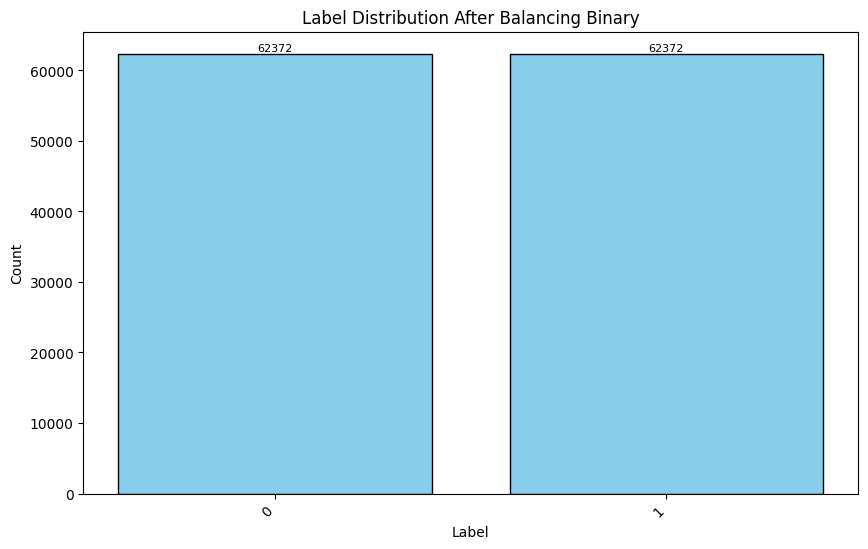

In [11]:
plt.figure(figsize=(10, 6))
bars = plt.bar(label_counts.index.astype(str), label_counts.values, color='skyblue', edgecolor='black')

plt.title("Label Distribution After Balancing Binary")
plt.xlabel("Label")
plt.ylabel("Count")

# Add value labels on top of bars 
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 100,  
             f'{height}', ha='center', va='bottom', fontsize=8)

# Rotate x labels 
plt.xticks(rotation=45, ha='right')

# Save as PNG
plt.savefig("Label Distribution After Balancing Binary.png", dpi=800, bbox_inches='tight')

plt.show()

In [12]:
df_new = X.copy()       # copy X to preserve original
df_new['label'] = y

In [13]:
# Save to CSV
df_new.to_csv("ctrainb.csv", index=False)